### Importing librairies:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

 # I. Pattern of sales per hour:

### importing data:

In [2]:
data='All Data.xlsx'
df = pd.read_excel(data)
df.head()

,March,Unnamed: 1,Unnamed: 2,Unnamed: 3,June,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sep,Unnamed: 9,Unnamed: 10,Unnamed: 11,Dec,Unnamed: 13,Unnamed: 14
0,Hour,Orders,Sales,NaN,Hour,Orders,Sales,NaN,Hour,Orders,Sales,NaN,Hour,Orders,Sales
1,0,1049,95457,NaN,0,1034,95930,NaN,0,830,77972,NaN,0,1048,94534
2,1,791,71726,NaN,1,869,77108,NaN,1,591,49036,NaN,1,845,72965
3,2,334,30693,NaN,2,274,23167,NaN,2,0,0,NaN,2,0,0
4,3,35,2623,NaN,3,191,16041,NaN,3,0,0,NaN,3,0,0


### Data processing:

In [3]:
df2=df.copy()
df2=df2.iloc[:,[2,6,10,14]]
df2=df2.rename(columns={'Unnamed: 2':'First quarter','Unnamed: 6':'Second quarter','Unnamed: 10':'Third quarter','Unnamed: 14':'Forth quarter'})
df2=df2.drop([0])
df2=pd.DataFrame(df2,dtype="int")
df2.insert(0,'Hours',range(0,24))
df2.head()

,Hours,First quarter,Second quarter,Third quarter,Forth quarter
1,0,95457,95930,77972,94534
2,1,71726,77108,49036,72965
3,2,30693,23167,0,0
4,3,2623,16041,0,0
5,4,0,1524,0,0


Creating a table containing the quarters and their sales per hour 

In [4]:
df3=df2.copy()
df3=df3.melt('Hours',var_name='Quarters',value_name='Sales')
df3.head()

,Hours,Quarters,Sales
0,0,First quarter,95457
1,1,First quarter,71726
2,2,First quarter,30693
3,3,First quarter,2623
4,4,First quarter,0


Adding total sales over a year

In [5]:
df2['Total Sales']=df2['First quarter']+df2['Second quarter']+df2['Third quarter']+df2['Forth quarter']
df2.head()

,Hours,First quarter,Second quarter,Third quarter,Forth quarter,Total Sales
1,0,95457,95930,77972,94534,363893
2,1,71726,77108,49036,72965,270835
3,2,30693,23167,0,0,53860
4,3,2623,16041,0,0,18664
5,4,0,1524,0,0,1524


Creating a table that has the sales for each quarter:

In [6]:
Sum={'Quarters': ['First quarter','Second quarter','Third quarter','Forth quarter'], 'sales': [df2['First quarter'].sum(),df2['Second quarter'].sum(),df2['Third quarter'].sum(),df2['Forth quarter'].sum()]}
Sum=pd.DataFrame(data=Sum)
Sum.head()

,Quarters,sales
0,First quarter,920249
1,Second quarter,1170933
2,Third quarter,1316840
3,Forth quarter,1412638


## Analysis:

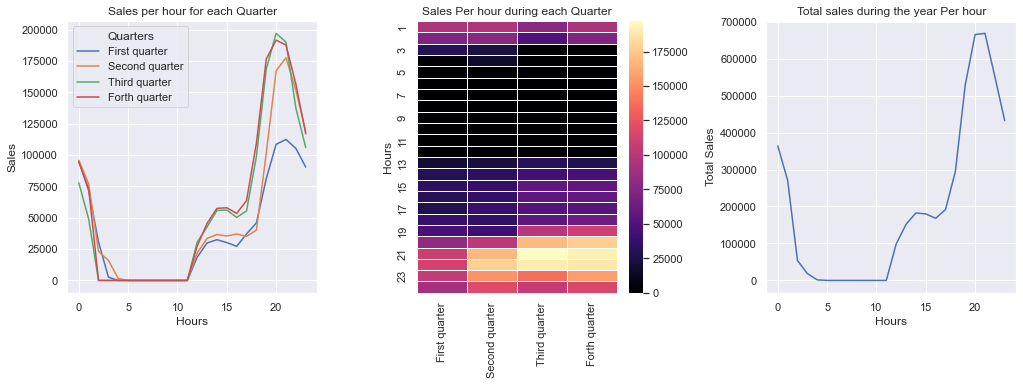

In [7]:
sns.set_theme()
fig, ax =plt.subplots(1,3,figsize=(17,5))
plt.subplots_adjust(wspace = 0.4)
g = sns.lineplot(x="Hours", y="Sales", hue='Quarters', data=df3,ax=ax[0]).set(title='Sales per hour for each Quarter')
heatmap =sns.heatmap(df2.iloc[:,1:-1],linewidths=.5,cmap="magma",ax=ax[1]).set(title='Sales Per hour during each Quarter')
g2=sns.lineplot(x='Hours',y='Total Sales',data=df2,ax=ax[2]).set(title='Total sales during the year Per hour')
ax[1].set_ylabel('Hours')
plt.show()

We see that the sale's trend is identical for all quarters so there is no abnormal change concerning sales between quarters. 

The sales are null between 4 am and 12 pm which is normally the time  during which the stores close.

It starts increasing slowly till 18 pm.

The rate of sales increase rapidly from 6pm till it reaches it peak around 20.

Then it decreases late at night around 23 pm and 0 am till the stores close at 2 AM.

The sales at 2 am became null starting from the third quarter, we can presume that the stores started closing at 2 am

The last figure shows the total number of sales per hour during all year. we see the overall trend is the same as the trend of sales per each quarter

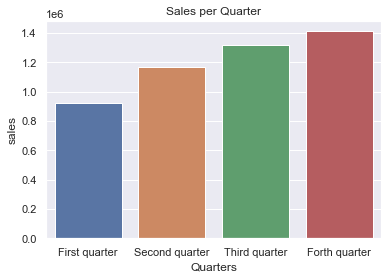

In [8]:
g1=sns.barplot(Sum.iloc[:,0],Sum.iloc[:,1],).set(title='Sales per Quarter')

We see a consistant increase in sales per quarter which is a sign of a healthy business

# II. Popular Dishes analysis:

### Importing data:

In [9]:
data='All Data.xlsx'
df = pd.read_excel(data, sheet_name='Popular Dishes')
df.head()

,March,Unnamed: 1,Unnamed: 2,Unnamed: 3,June,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sep,Unnamed: 9,Unnamed: 10,Unnamed: 11,Dec,Unnamed: 13,Unnamed: 14
0,Dish,Total,Sales,NaN,Dish,Total,Sales,NaN,Dish,Total,Sales,NaN,Dish,Total,Sales
1,Shrimp Dynamite,2088,58464,NaN,Original Sliders,1927,57810,NaN,Alaska Roll,4270,192150,NaN,Alaska Roll,3746,168570
2,Las Vegas Roll,2066,88838,NaN,Alaska Roll,1827,82215,NaN,Las Vegas Roll,2588,111284,NaN,Las Vegas Roll,2545,109435
3,Original Sliders,1864,55920,NaN,Shrimp Dynamite,1771,49588,NaN,Crab Salad,2214,73062,NaN,Shrimp Dynamite,2229,62412
4,Alaska Roll,1800,81000,NaN,Las Vegas Roll,1695,72885,NaN,Shrimp Dynamite,2143,60004,NaN,Original Sliders,2148,64440


### Processing data:

In [10]:
df1=df.iloc[:49,:3]
df2=df.iloc[:,4:7]
df3=df.iloc[:48,8:11]
df4=df.iloc[:49,12:15]
df4=df4.rename(columns={'Dec':'Dish','Unnamed: 13':'Total','Unnamed: 14':'Sales'})
df4=df4.drop([0])
df3=df3.rename(columns={'Sep':'Dish','Unnamed: 9':'Total','Unnamed: 10':'Sales'})
df3=df3.drop([0])
df2=df2.rename(columns={'June':'Dish','Unnamed: 5':'Total','Unnamed: 6':'Sales'})
df2=df2.drop([0])
df1=df1.rename(columns={'March':'Dish','Unnamed: 1':'Total','Unnamed: 2':'Sales'})
df1=df1.drop([0])
print('df(i) is the table containing the data of the ith quarter')
df1.head()

df(i) is the table containing the data of the ith quarter


,Dish,Total,Sales
1,Shrimp Dynamite,2088,58464
2,Las Vegas Roll,2066,88838
3,Original Sliders,1864,55920
4,Alaska Roll,1800,81000
5,Alaska Roll,1444,64980


Creating a table containing the number of sales over the year

In [11]:
df_all=pd.concat([df1, df2,df3,df4]).groupby(['Dish']).sum().reset_index()
df_all=df_all.sort_values('Total', ascending=False)
df_all.head()

,Dish,Total,Sales
43,Alaska Roll,11643,523935
77,Las Vegas Roll,8894,382442
92,Original Sliders,7890,236700
99,Shrimp Dynamite,6143,172004
51,California Roll,6111,201663


## Analysis:

### Top dishes per trimester

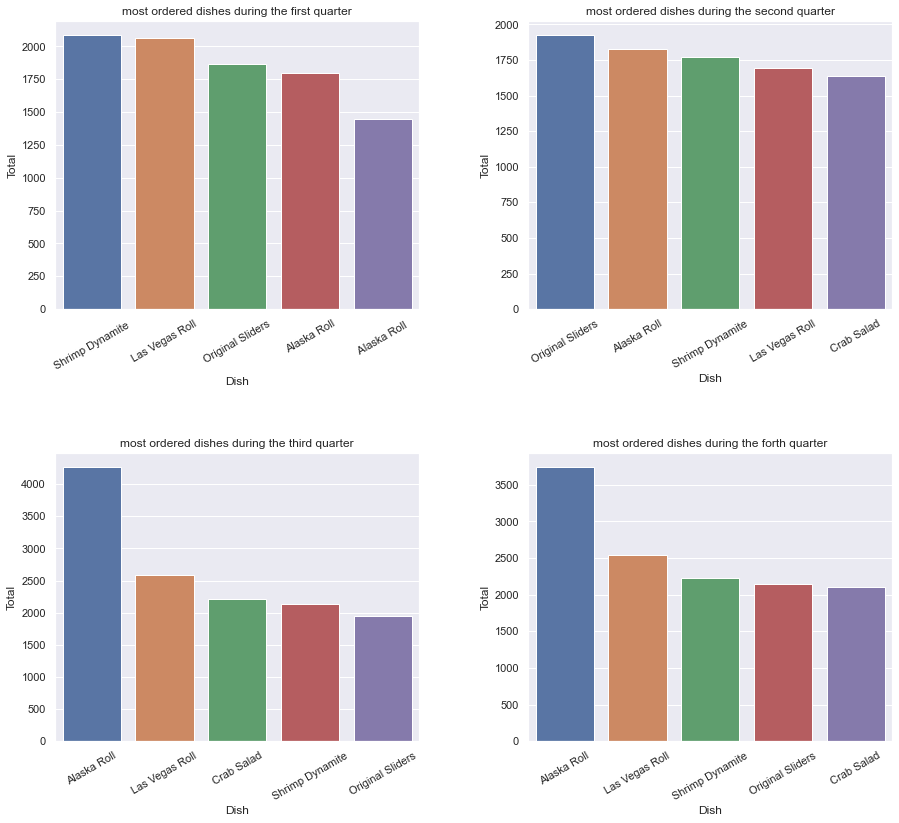

In [12]:
fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Dish']=df1['Dish'].astype('string')
pd.to_numeric(df1['Total'])
g1=sns.barplot(df1.iloc[0:5,0],df1.iloc[0:5,1],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('most ordered dishes during the first quarter')

df2['Dish']=df2['Dish'].astype('string')
pd.to_numeric(df2['Total'])
g2=sns.barplot(df2.iloc[0:5,0],df2.iloc[0:5,1],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('most ordered dishes during the second quarter')

df3['Dish']=df3['Dish'].astype('string')
pd.to_numeric(df3['Total'])
g3=sns.barplot(df3.iloc[0:5,0],df3.iloc[0:5,1],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('most ordered dishes during the third quarter')

df4['Dish']=df4['Dish'].astype('string')
pd.to_numeric(df4['Total'])
g4=sns.barplot(df4.iloc[0:5,0],df4.iloc[0:5,1],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('most ordered dishes during the forth quarter')

plt.show()

The 'Alaska Roll' / 'Las Vegas ROLL' / Original Sliders / Shrimp Dynamite are the dishes that remain in top 5 orders during all quarters.

We see tha the Alaska Rolls inserted two times during the first and second quarter. The most plausible explanation is an error in entering data because we can see that the sales in the third and forth quarters equal almost the double of sales during the two firsts quarters.

If the last hypothesis is right, the Alaska Roll is the most popular dish by a large margin in comparison with other dishes during all quarters.

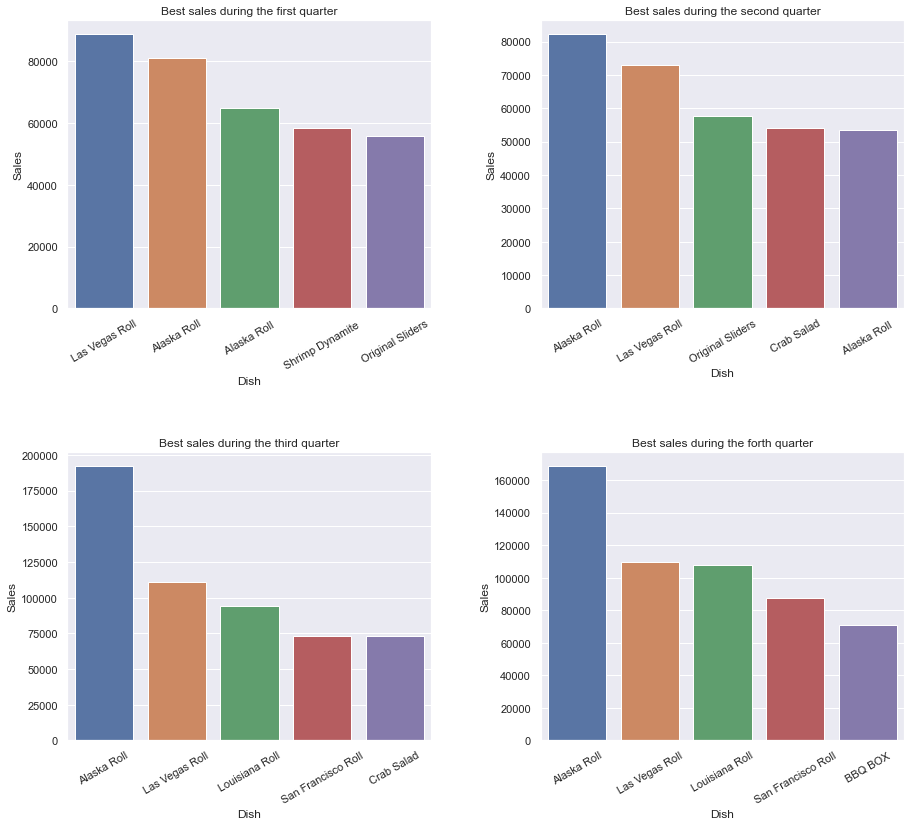

In [13]:
df1=df1.sort_values('Sales', ascending=False)
df2=df2.sort_values('Sales', ascending=False)
df3=df3.sort_values('Sales', ascending=False)
df4=df4.sort_values('Sales', ascending=False)

fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Dish']=df1['Dish'].astype('string')
pd.to_numeric(df1['Sales'])
g1=sns.barplot(df1.iloc[0:5,0],df1.iloc[0:5,2],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('Best sales during the first quarter')

df2['Dish']=df2['Dish'].astype('string')
pd.to_numeric(df2['Sales'])
g2=sns.barplot(df2.iloc[0:5,0],df2.iloc[0:5,2],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('Best sales during the second quarter')

df3['Dish']=df3['Dish'].astype('string')
pd.to_numeric(df3['Sales'])
g3=sns.barplot(df3.iloc[0:5,0],df3.iloc[0:5,2],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('Best sales during the third quarter')

df4['Dish']=df4['Dish'].astype('string')
pd.to_numeric(df4['Sales'])
g4=sns.barplot(df4.iloc[0:5,0],df4.iloc[0:5,2],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('Best sales during the forth quarter')

plt.show()

The 'Las Vegas Roll' and 'Alaska Roll' are the dishes that remain in top 5 sales during all quarters.

We see that we have the Alaska Rolls inserted two times during the first and second quarter. The most plausible explanation is an error in entering data because we can see that the sales in the third and forth quarters equal almost the double of sales during the two firsts quarters.

If the last hypothesis is right, the Alaska Roll is the most popular dish by a large margin in comparison witho the ther dishes during all quarters.



### Top dishes over the year:

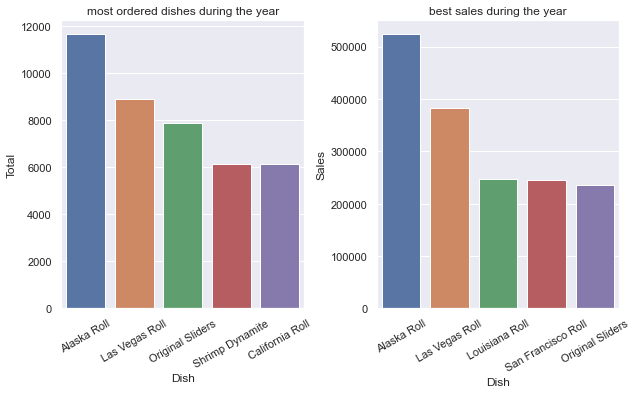

In [14]:
df_all=pd.concat([df1, df2,df3,df4]).groupby(['Dish']).sum().reset_index()
df_all=df_all.sort_values('Total', ascending=False)

fig, ax =plt.subplots(1,2,figsize=(10,4))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df_all['Dish']=df_all['Dish'].astype('string')
pd.to_numeric(df_all['Total'])
g1=sns.barplot(df_all.iloc[0:5,0],df_all.iloc[0:5,1],ax=ax[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0].title.set_text('most ordered dishes during the year')


df_all['Dish']=df_all['Dish'].astype('string')
pd.to_numeric(df_all['Total'])
df_all_Sales=df_all.sort_values('Sales', ascending=False)
g1=sns.barplot(df_all_Sales.iloc[0:5,0],df_all_Sales.iloc[0:5,2],ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[1].title.set_text('best sales during the year')

plt.show()

The Alaska Rolls and the Las Vegas Roll are the most ordered and sold dishes.

The California Rolls/Shrimp Dynamite/California Roll are more often ordered than the Louisiana Rolls but the sales of the Louisiana are superior. 
It is probably due to the price of the dishes. For a better comparison, the preparation costs of each dish should be included to compare the profit of the dishes ratherthan just the sales.

### Bottom dishes per trimester

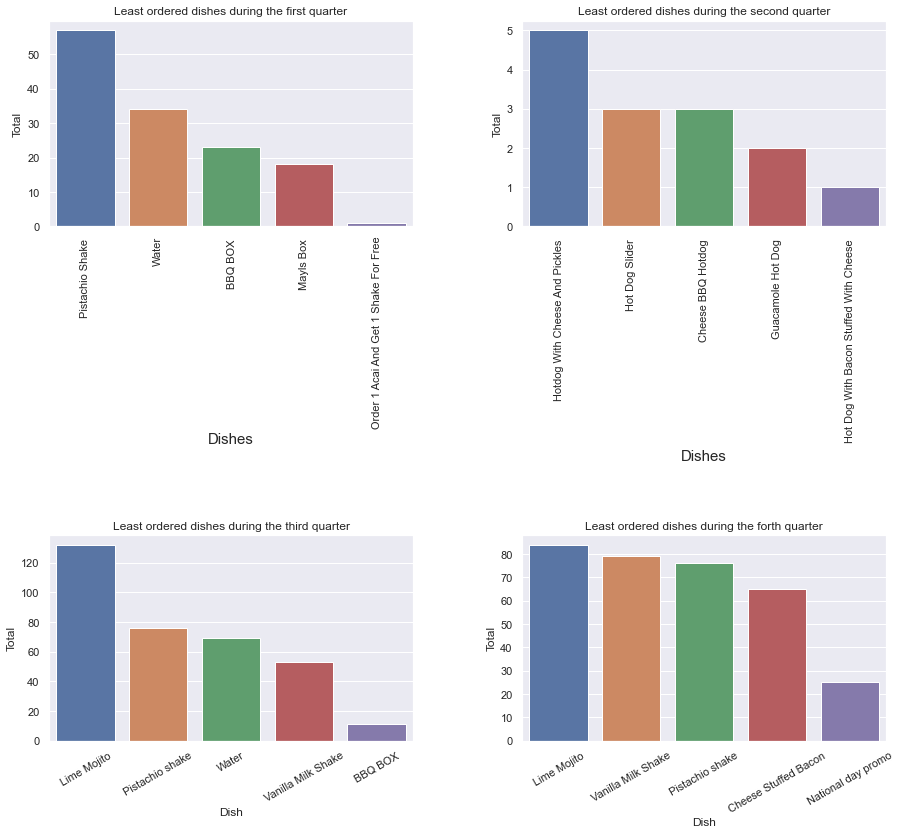

In [15]:
df1=df1.sort_values('Total', ascending=False)
df2=df2.sort_values('Total', ascending=False)
df3=df3.sort_values('Total', ascending=False)
df4=df4.sort_values('Total', ascending=False)

fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 1.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Dish']=df1['Dish'].astype('string')
pd.to_numeric(df1['Total'])
g1=sns.barplot(df1.iloc[-5:,0],df1.iloc[-5:,1],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('Least ordered dishes during the first quarter')

df2['Dish']=df2['Dish'].astype('string')
pd.to_numeric(df2['Total'])
g2=sns.barplot(df2.iloc[-5:,0],df2.iloc[-5:,1],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
ax[0,1].set_xlabel('Dishes', fontsize = 15)
ax[0,1].title.set_text('Least ordered dishes during the second quarter')

df3['Dish']=df3['Dish'].astype('string')
pd.to_numeric(df3['Total'])
g3=sns.barplot(df3.iloc[-5:,0],df3.iloc[-5:,1],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('Least ordered dishes during the third quarter')

df4['Dish']=df4['Dish'].astype('string')
pd.to_numeric(df4['Total'])
g4=sns.barplot(df4.iloc[-5:,0],df4.iloc[-5:,1],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('Least ordered dishes during the forth quarter')

plt.show()

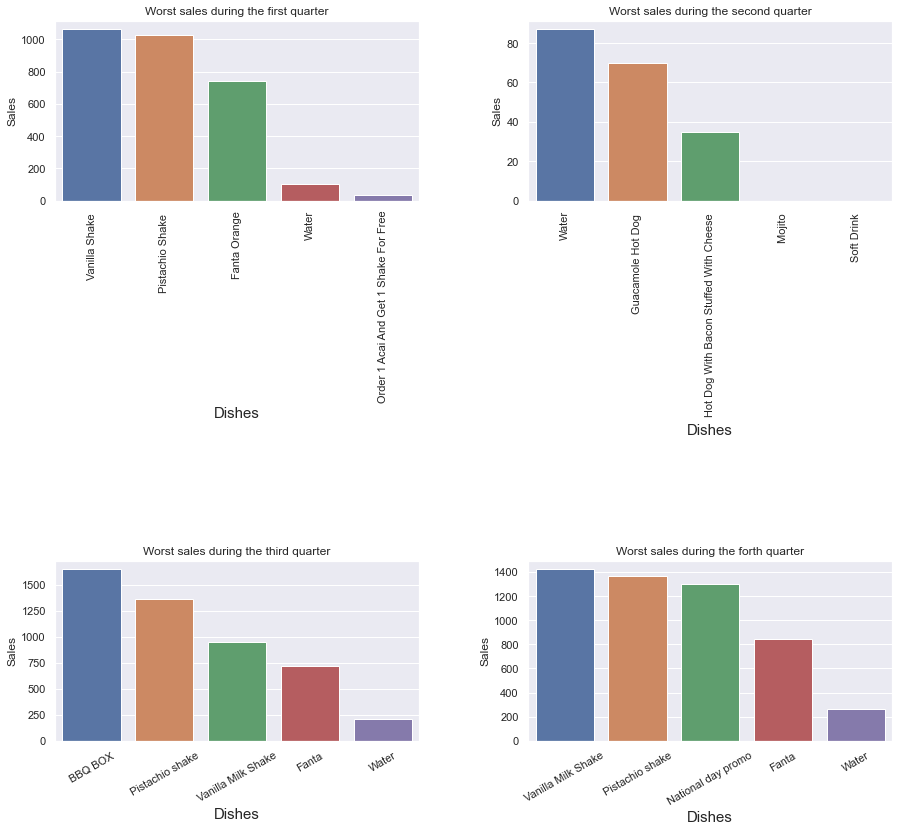

In [16]:
df1=df1.sort_values('Sales', ascending=False)
df2=df2.sort_values('Sales', ascending=False)
df3=df3.sort_values('Sales', ascending=False)
df4=df4.sort_values('Sales', ascending=False)

fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 2 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Dish']=df1['Dish'].astype('string')
pd.to_numeric(df1['Sales'])
g1=sns.barplot(df1.iloc[-5:,0],df1.iloc[-5:,2],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('Worst sales during the first quarter')

df2['Dish']=df2['Dish'].astype('string')
pd.to_numeric(df2['Sales'])
g2=sns.barplot(df2.iloc[-5:,0],df2.iloc[-5:,2],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
ax[0,1].set_xlabel('Dishes', fontsize = 15)
ax[0,1].title.set_text('Worst sales during the second quarter')

df3['Dish']=df3['Dish'].astype('string')
pd.to_numeric(df3['Sales'])
g3=sns.barplot(df3.iloc[-5:,0],df3.iloc[-5:,2],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].set_xlabel('Dishes', fontsize = 15)
ax[1,0].title.set_text('Worst sales during the third quarter')

df4['Dish']=df4['Dish'].astype('string')
pd.to_numeric(df4['Sales'])
g4=sns.barplot(df4.iloc[-5:,0],df4.iloc[-5:,2],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].set_xlabel('Dishes', fontsize = 15)
ax[1,1].title.set_text('Worst sales during the forth quarter')

plt.show()

The least ordered/sold dishes change every quarter.

The least ordered/sold food are side dishes/drinks | Promos that remain for a limited time | Hot dogs

The number of orders/sales during the second quarter is much lower than the other quarters

Mojito/Soft Drinks has 0 as a price and they were present only in the second quarter

### Bottom dishes over the year:

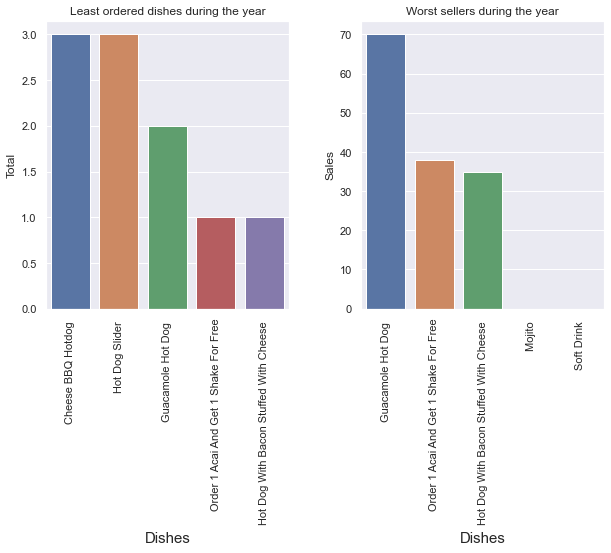

In [17]:
fig, ax =plt.subplots(1,2,figsize=(10,4))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df_all['Dish']=df_all['Dish'].astype('string')
pd.to_numeric(df_all['Total'])
g1=sns.barplot(df_all.iloc[-5:,0],df_all.iloc[-5:,1],ax=ax[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax[0].set_xlabel('Dishes', fontsize = 15)
ax[0].title.set_text('Least ordered dishes during the year')

df_all['Dish']=df_all['Dish'].astype('string')
pd.to_numeric(df_all['Total'])
df_all_Sales=df_all.sort_values('Sales', ascending=False)
g1=sns.barplot(df_all_Sales.iloc[-5:,0],df_all_Sales.iloc[-5:,2],ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax[1].set_xlabel('Dishes', fontsize = 15)
ax[1].title.set_text('Worst sellers during the year')

plt.show()

The least ordered/sold food are side dishes | drinks | Promos that remain for a limited time | Hot dogs


### Comparaison between the dishes with the highest and lowest sales/orders:

#### Creating a table containing the dishes with highest and lowest sales 

In [18]:
df1.head(5)
rank1=pd.concat([df1.head(),df1.tail()])
rank2=pd.concat([df2.head(),df2.tail()])
rank3=pd.concat([df3.head(),df3.tail()])
rank4=pd.concat([df4.head(),df4.tail()])

rank1=rank1.sort_values('Sales', ascending=False)
rank2=rank2.sort_values('Sales', ascending=False)
rank3=rank3.sort_values('Sales', ascending=False)
rank4=rank4.sort_values('Sales', ascending=False)
rank4

,Dish,Total,Sales
1,Alaska Roll,3746,168570
2,Las Vegas Roll,2545,109435
6,Louisiana Roll,2078,108056
7,San Francisco Roll,1990,87560
27,BBQ BOX,472,70800
45,Vanilla Milk Shake,79,1422
46,Pistachio shake,76,1368
48,National day promo,25,1300
39,Fanta,169,845
43,Water,87,261


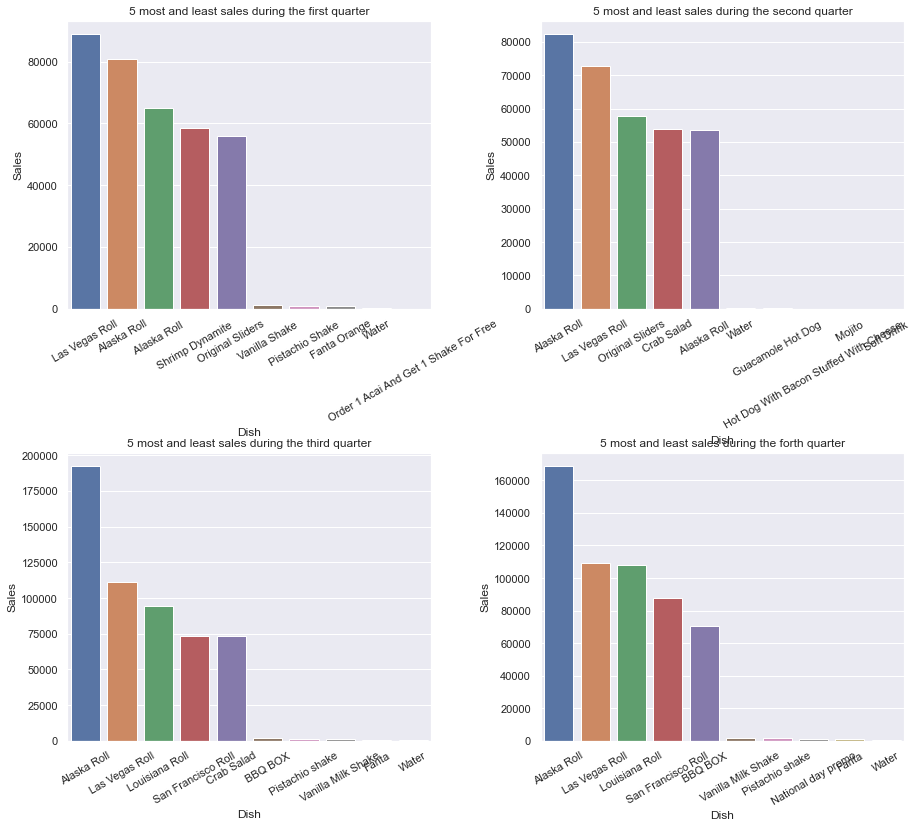

In [19]:
fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

rank1['Dish']=rank1['Dish'].astype('string')
pd.to_numeric(rank1['Total'])
g1=sns.barplot(rank1.iloc[:,0],rank1.iloc[:,2],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('5 most and least sales during the first quarter')

rank2['Dish']=rank2['Dish'].astype('string')
pd.to_numeric(df2['Total'])
g2=sns.barplot(rank2.iloc[:,0],rank2.iloc[:,2],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('5 most and least sales during the second quarter')

rank3['Dish']=rank3['Dish'].astype('string')
pd.to_numeric(rank3['Total'])
g3=sns.barplot(rank3.iloc[:,0],rank3.iloc[:,2],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('5 most and least sales during the third quarter')

rank4['Dish']=rank4['Dish'].astype('string')
pd.to_numeric(rank4['Total'])
g4=sns.barplot(rank4.iloc[:,0],rank4.iloc[:,2],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('5 most and least sales during the forth quarter')
plt.show()

We can see a huge difference in sales between the top and bottom dishes 

# III. Orders' distribution:

In [20]:
data='All Data.xlsx'
df = pd.read_excel(data, sheet_name='Orders Summary')
df

,March,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Month,Orders,Cancelled,Sales,Online Orders,Cash Orders,Delivery Orders,Pickup Orders,Online Sales,Cash Sales,Delivery Sales,Pickup Sales
1,2021-03,4454,48,458808,3510,896,4406,0,373521,85287,458808,0
2,2021-04,3159,35,314286,2467,657,3124,0,250194,64092,314286,0
3,2021-05,4987,54,492012,3722,1211,4933,0,373658,118354,492012,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Month,Orders,Cancelled,Sales,Online Orders,Cash Orders,Delivery Orders,Pickup Orders,Online Sales,Cash Sales,Delivery Sales,Pickup Sales
7,2021-06,4504,50,451532,3611,843,4454,0,369347,82185,451532,0
8,2021-07,5206,63,523920,4134,1009,5143,0,425622,98298,523920,0
9,2021-08,5474,62,543849,4415,997,5412,0,450697,93152,543849,0


### Data preparation:

In [21]:
df=df.drop([4,5,6,10,11,12,16,17,18])
df.columns = df.iloc[0]
df=df.drop([0])
df.drop(columns=['Pickup Orders','Pickup Sales'])
df

,Month,Orders,Cancelled,Sales,Online Orders,Cash Orders,Delivery Orders,Pickup Orders,Online Sales,Cash Sales,Delivery Sales,Pickup Sales
1,2021-03,4454,48,458808,3510,896,4406,0,373521,85287,458808,0
2,2021-04,3159,35,314286,2467,657,3124,0,250194,64092,314286,0
3,2021-05,4987,54,492012,3722,1211,4933,0,373658,118354,492012,0
7,2021-06,4504,50,451532,3611,843,4454,0,369347,82185,451532,0
8,2021-07,5206,63,523920,4134,1009,5143,0,425622,98298,523920,0
9,2021-08,5474,62,543849,4415,997,5412,0,450697,93152,543849,0
13,2021-09,5062,39,494514,4110,915,5025,0,411332,83182,494514,0
14,2021-10,4776,46,474053,3974,802,4776,0,400304,73749,474053,0
15,2021-11,4718,48,461510,3957,761,4718,0,391367,70143,461510,0
19,2021-12,4638,41,464830,3868,770,4638,0,392599,72231,464830,0


## Analysis:

Text(0.5, 0.98, 'Distribution summary')

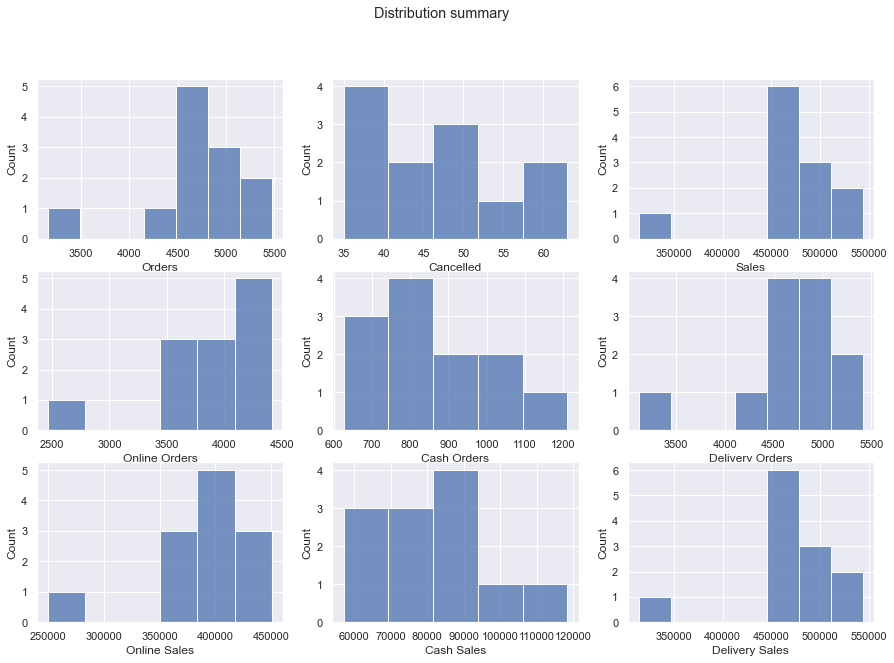

In [22]:
sns.set_theme()
fig, ax =plt.subplots(3,3,figsize=(15,10))

g1=sns.histplot(df,x='Orders',ax=ax[0,0])


g2=sns.histplot(df,x='Cancelled',ax=ax[0,1])

g3=sns.histplot(df,x='Sales',ax=ax[0,2])


g4=sns.histplot(df,x='Online Orders',ax=ax[1,0])

g5=sns.histplot(df,x='Cash Orders',ax=ax[1,1])

g6=sns.histplot(df,x='Delivery Orders',ax=ax[1,2])

g7=sns.histplot(df,x='Online Sales',ax=ax[2,0])

g8=sns.histplot(df,x='Cash Sales',ax=ax[2,1])

g9=sns.histplot(df,x='Delivery Sales',ax=ax[2,2])
fig.suptitle('Distribution summary')



**Orders**:

Most orders are between 4400 and  5500.

There is an outliner with 3500 orders which was during April.

It is recommended to find the cause of low orders in April

**Cancelled**:

The cancels orders range from 35 to 60 cancels per month


Approximately equally distributed without an outliner. It would still be recommended to find the causes of the higher number of cancels during the second quarter (June: 50 cancels | July: 62 | August: 63)



**Online Orders**:

Most Online orders are between 3500 and 4500

**Cash orders**:

Most Cash orders are between  800 and 1100

We see that most orders are online rather than cash orders 

**Same conclusions for Sales because Amount of Sales= 10 x Number of Orders**


# IV. Areas' Analysis:

### Importing data:

In [23]:
data='All Data.xlsx'
df = pd.read_excel(data, sheet_name='Area Wise Orders')
df

,March,Unnamed: 1,Unnamed: 2,Unnamed: 3,June,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sep,Unnamed: 9,Unnamed: 10,Unnamed: 11,Dec,Unnamed: 13,Unnamed: 14
0,Area code,Number of orders,Sales,NaN,Area code,Number of orders,Sales,NaN,Area code,Number of orders,Sales,NaN,Area code,Number of orders,Sales
1,Madinat Khalifa - A,1795,174665,NaN,Madinat Khalifa - A,2060,200042,NaN,Madinat Khalifa - A,1865,172992,NaN,Mohammed Bin Zayed City,1912,181550
2,Mohammed Bin Zayed City,1529,141982,NaN,Mohammed Bin Zayed City,1915,186145,NaN,Mohammed Bin Zayed City,1859,173682,NaN,Madinat Khalifa - A,1813,166119
3,Al Mushrif,816,86381,NaN,Al Mushrif,939,97209,NaN,Al Mushrif,821,84721,NaN,Al Mushrif,825,86634
4,Al Shamkha,505,54010,NaN,Shakhbout City,555,58623,NaN,Al Shamkha,532,54333,NaN,Shakhbout City,599,64287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Al Gurum Resort,2,199,NaN,Al Ras Al Akhdar,2,270,NaN,Al Ras Al Akhdar,2,232,NaN,Dhow Harbour (Al Mina),1,160
99,Qasr El Bahr,2,159,NaN,Al Gurum Resort,2,254,NaN,Madinat Khalifa - C,2,166,NaN,Saadiyat Island,1,85
100,Madinat Khalifa - C,2,100,NaN,Industrial Area,2,150,NaN,Al Kuwaitat,2,72,NaN,Qasr El Bahr,1,62
101,NaN,NaN,NaN,NaN,ICAD,1,207,NaN,Al Sader,1,109,NaN,Al Nabagh,1,47


### Data processing:

In [24]:
df1=df.iloc[:101,:3]
df2=df.iloc[:103,4:7]
df3=df.iloc[:103,8:11]
df4=df.iloc[:102,12:15]
df4=df4.rename(columns={'Dec':'Area code','Unnamed: 13':'Number of orders','Unnamed: 14':'Sales'})
df4=df4.drop([0])
df3=df3.rename(columns={'Sep':'Area code','Unnamed: 9':'Number of orders','Unnamed: 10':'Sales'})
df3=df3.drop([0])
df2=df2.rename(columns={'June':'Area code','Unnamed: 5':'Number of orders','Unnamed: 6':'Sales'})
df2=df2.drop([0])
df1=df1.rename(columns={'March':'Area code','Unnamed: 1':'Number of orders','Unnamed: 2':'Sales'})
df1=df1.drop([0])
print('df(i) is the table containing the data of the ith quarter')
df1

df(i) is the table containing the data of the ith quarter


,Area code,Number of orders,Sales
1,Madinat Khalifa - A,1795,174665
2,Mohammed Bin Zayed City,1529,141982
3,Al Mushrif,816,86381
4,Al Shamkha,505,54010
5,Shakhbout City,417,44982
...,...,...,...
96,Industrial Area,3,241
97,Mubzara,2,359
98,Al Gurum Resort,2,199
99,Qasr El Bahr,2,159


In [25]:
df_all=pd.concat([df1, df2,df3,df4]).groupby(['Area code']).sum().reset_index()
df_all=df_all.sort_values('Number of orders', ascending=False)
print('table containing the data over all year')
df_all

table containing the data over all year


,Area code,Number of orders,Sales
84,Madinat Khalifa - A,7533,713818
90,Mohammed Bin Zayed City,7215,683359
40,Al Mushrif,3401,354945
103,Shakhbout City,2082,220178
62,Al Shamkha,2063,216004
...,...,...,...
91,Mubzara,3,453
76,Dhow Harbour (Al Mina),2,207
50,Al Raha Beach,2,216
56,Al Sader,1,109


## Analysis:

### Top areas per trimester

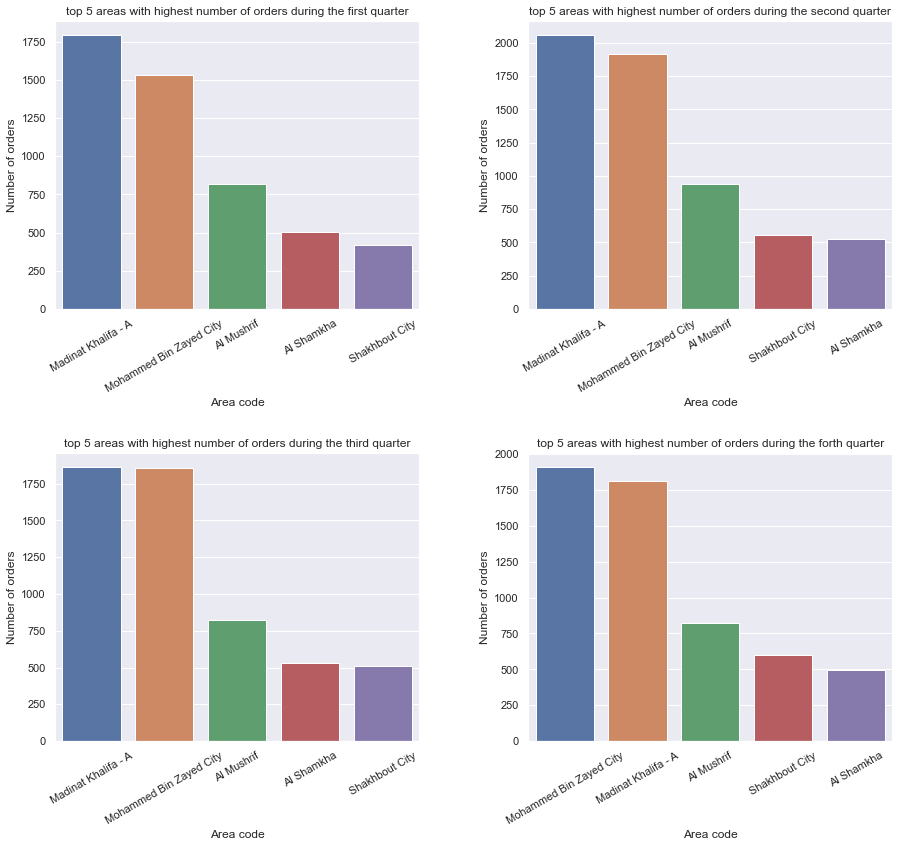

In [26]:
sns.set_theme()
fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Area code']=df1['Area code'].astype('string')
#pd.to_numeric(df1['Total'])
g1=sns.barplot(df1.iloc[0:5,0],df1.iloc[0:5,1],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('top 5 areas with highest number of orders during the first quarter')

df2['Area code']=df2['Area code'].astype('string')
#pd.to_numeric(df2['Total'])
g2=sns.barplot(df2.iloc[0:5,0],df2.iloc[0:5,1],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('top 5 areas with highest number of orders during the second quarter')

g3=sns.barplot(df3.iloc[0:5,0],df3.iloc[0:5,1],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('top 5 areas with highest number of orders during the third quarter')

g4=sns.barplot(df4.iloc[0:5,0],df4.iloc[0:5,1],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('top 5 areas with highest number of orders during the forth quarter')



plt.show()

The 'Madinat Khalifal' / 'Mohammed Bin Zayed City' / Al Mushrif / Al Shamkhae / Shakhbout City are the top 5 areas with the most number of orders  during all quarters.

'Madinat Khalifal' / 'Mohammed Bin Zayed City' are in the top 2 and 'Al Mushrif' remains in third  during all quarters


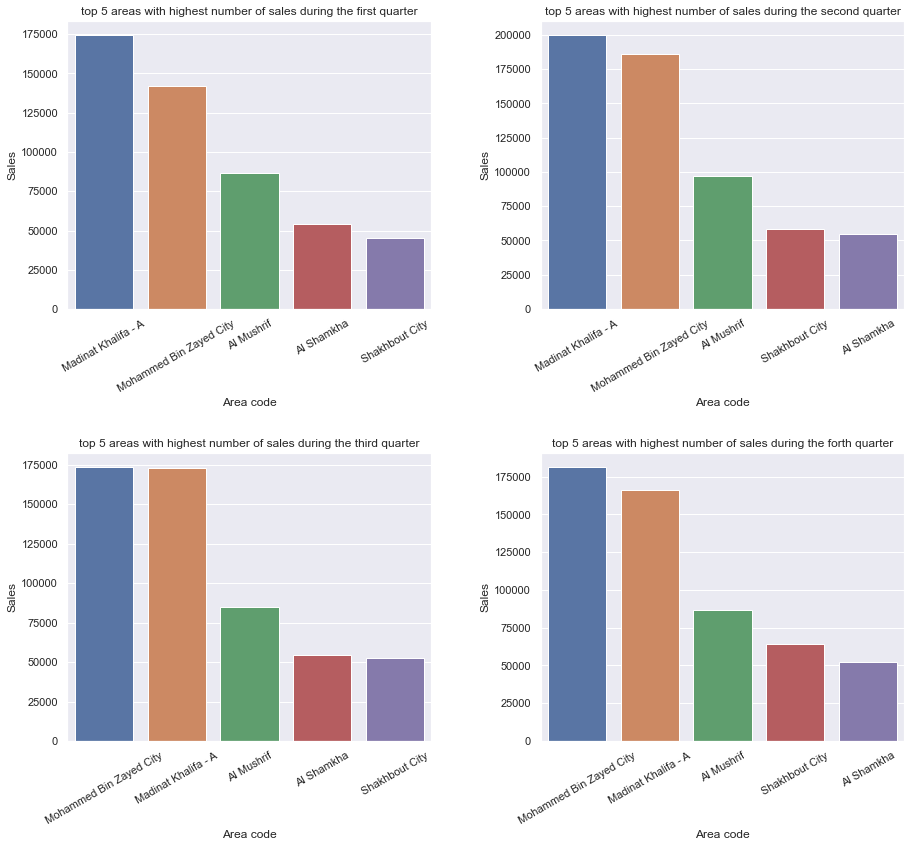

In [27]:
df1=df1.sort_values('Sales', ascending=False)
df2=df2.sort_values('Sales', ascending=False)
df3=df3.sort_values('Sales', ascending=False)
df4=df4.sort_values('Sales', ascending=False)

fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Area code']=df1['Area code'].astype('string')
pd.to_numeric(df1['Sales'])
g1=sns.barplot(df1.iloc[0:5,0],df1.iloc[0:5,2],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('top 5 areas with highest number of sales during the first quarter')

df2['Area code']=df2['Area code'].astype('string')
pd.to_numeric(df2['Sales'])
g2=sns.barplot(df2.iloc[0:5,0],df2.iloc[0:5,2],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('top 5 areas with highest number of sales during the second quarter')

df3['Area code']=df3['Area code'].astype('string')
pd.to_numeric(df3['Sales'])
g3=sns.barplot(df3.iloc[0:5,0],df3.iloc[0:5,2],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('top 5 areas with highest number of sales during the third quarter')

df4['Area code']=df4['Area code'].astype('string')
pd.to_numeric(df4['Sales'])
g4=sns.barplot(df4.iloc[0:5,0],df4.iloc[0:5,2],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('top 5 areas with highest number of sales during the forth quarter')

plt.show()

Same conclusions for Sales because there is a big correlation between Sales and Orders (1 order = 10 unit of Sales)

### Top areas over the year

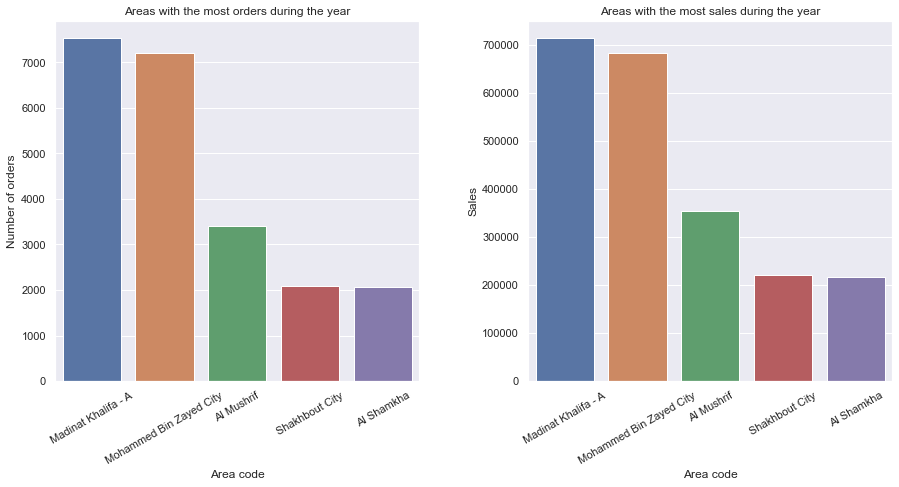

In [28]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df_all['Area code']=df_all['Area code'].astype('string')
pd.to_numeric(df_all['Number of orders'])
g1=sns.barplot(df_all.iloc[0:5,0],df_all.iloc[0:5,1],ax=ax[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0].title.set_text('Areas with the most orders during the year')

df_all['Area code']=df_all['Area code'].astype('string')

df_all_Sales=df_all.sort_values('Sales', ascending=False)
g1=sns.barplot(df_all_Sales.iloc[0:5,0],df_all_Sales.iloc[0:5,2],ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[1].title.set_text('Areas with the most sales during the year')

plt.show()

### Bottom areas per trimester:

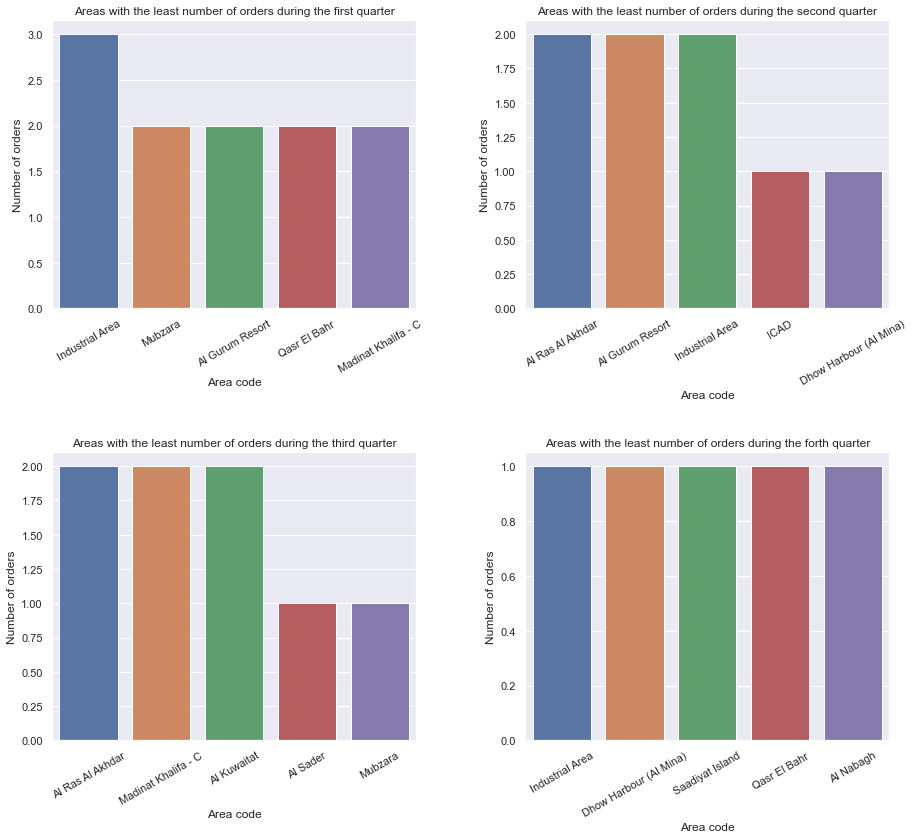

In [29]:
df1=df1.sort_values('Number of orders', ascending=False)
df2=df2.sort_values('Number of orders', ascending=False)
df3=df3.sort_values('Number of orders', ascending=False)
df4=df4.sort_values('Number of orders', ascending=False)

sns.set_theme()
fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Area code']=df1['Area code'].astype('string')
#pd.to_numeric(df1['Total'])
g1=sns.barplot(df1.iloc[-5:,0],df1.iloc[-5:,1],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('Areas with the least number of orders during the first quarter')

df2['Area code']=df2['Area code'].astype('string')
#pd.to_numeric(df2['Total'])
g2=sns.barplot(df2.iloc[-5:,0],df2.iloc[-5:,1],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('Areas with the least number of orders during the second quarter')

g3=sns.barplot(df3.iloc[-5:,0],df3.iloc[-5:,1],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('Areas with the least number of orders during the third quarter')

g4=sns.barplot(df4.iloc[-5:,0],df4.iloc[-5:,1],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text('Areas with the least number of orders during the forth quarter')



plt.show()

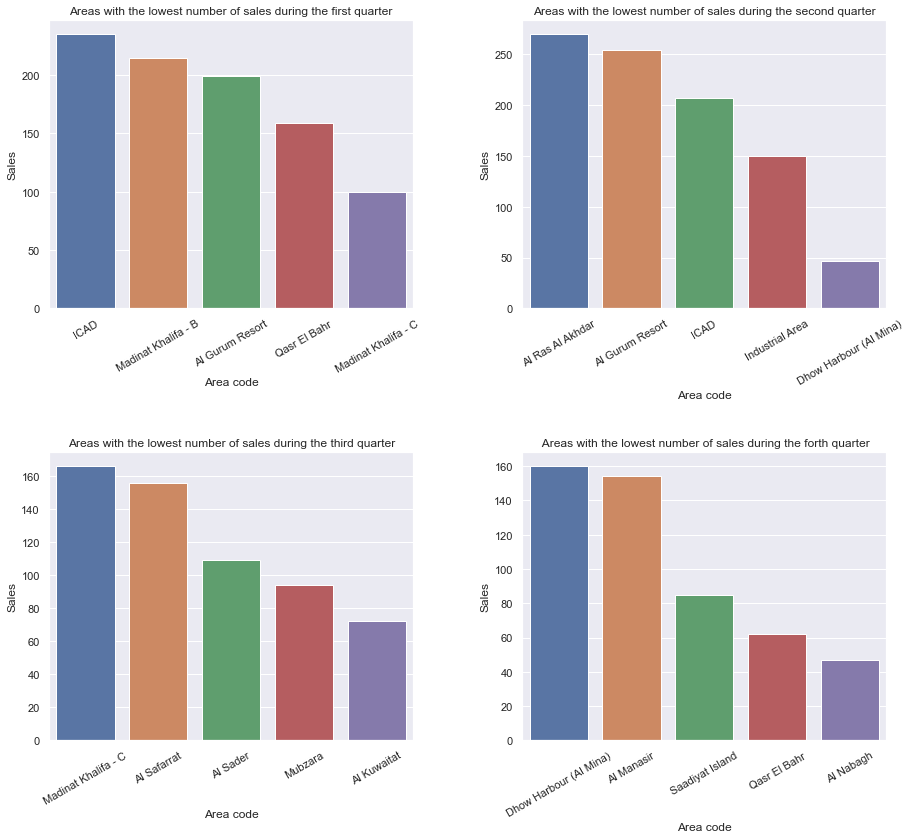

In [30]:
df1=df1.sort_values('Sales', ascending=False)
df2=df2.sort_values('Sales', ascending=False)
df3=df3.sort_values('Sales', ascending=False)
df4=df4.sort_values('Sales', ascending=False)

fig, ax =plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df1['Area code']=df1['Area code'].astype('string')
pd.to_numeric(df1['Sales'])
g1=sns.barplot(df1.iloc[-5:,0],df1.iloc[-5:,2],ax=ax[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0,0].title.set_text('Areas with the lowest number of sales during the first quarter')

df2['Area code']=df2['Area code'].astype('string')
pd.to_numeric(df2['Sales'])
g2=sns.barplot(df2.iloc[-5:,0],df2.iloc[-5:,2],ax=ax[0,1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
ax[0,1].title.set_text('Areas with the lowest number of sales during the second quarter')

df3['Area code']=df3['Area code'].astype('string')
pd.to_numeric(df3['Sales'])
g3=sns.barplot(df3.iloc[-5:,0],df3.iloc[-5:,2],ax=ax[1,0])
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)
ax[1,0].title.set_text('Areas with the lowest number of sales during the third quarter')

df4['Area code']=df4['Area code'].astype('string')
pd.to_numeric(df4['Sales'])
g4=sns.barplot(df4.iloc[-5:,0],df4.iloc[-5:,2],ax=ax[1,1])
g4.set_xticklabels(g4.get_xticklabels(), rotation=30)
ax[1,1].title.set_text(' Areas with the lowest number of sales during the forth quarter')

plt.show()

### Bottom areas over the year:

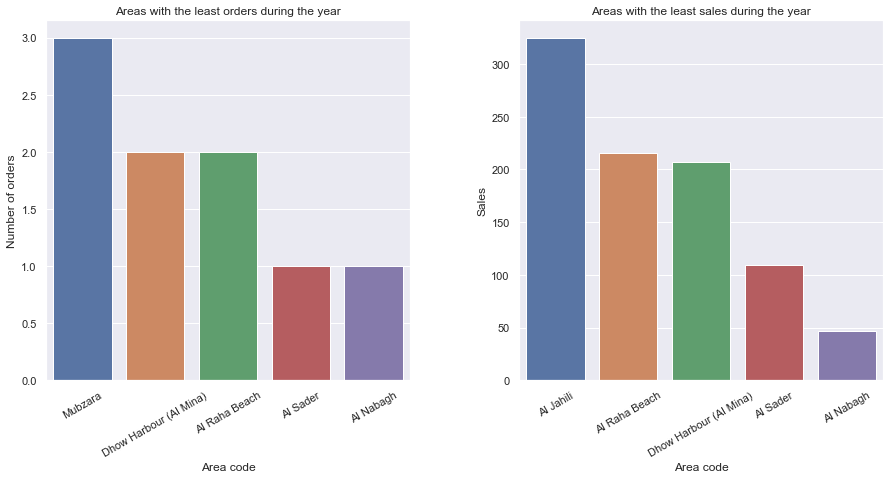

In [31]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0,   # the bottom of the subplots of the figure
top = 1,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.5 ,  # the amount of height reserved for white space between subplots)
                   )

df_all['Area code']=df_all['Area code'].astype('string')
pd.to_numeric(df_all['Number of orders'])
g1=sns.barplot(df_all.iloc[-5:,0],df_all.iloc[-5:,1],ax=ax[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[0].title.set_text('Areas with the least orders during the year')

df_all['Area code']=df_all['Area code'].astype('string')

df_all_Sales=df_all.sort_values('Sales', ascending=False)
g1=sns.barplot(df_all_Sales.iloc[-5:,0],df_all_Sales.iloc[-5:,2],ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
#ax[0,0].set_xlabel('Dishes', fontsize = 15)
ax[1].title.set_text('Areas with the least sales during the year')

plt.show()

Al Nabagh / Al Sader / Al Raha Beach / Dhow Harbour / Mubzara have the worst number of orders over last year ranging from 1 to 3 orders. 

Al Nabagh / Al Sader / Al Raha Beach / Dhow Harbour / Al Jahli  have the worst number of sales over last year ranging from 50 to  350 total sales.


# Rejected orders:

In [32]:
data='All Data.xlsx'
df = pd.read_excel(data, sheet_name='Rejected ORders')
df.head()

,March,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Month,Rejected orders,Rejection rate,Sales loss,Reason,Rejected orders,Rejection rate,Sales loss
1,2021-03,21,0.0047,2270,Unreachable,5,0.1163,502
2,2021-04,11,0.0035,1360,Menu Account Settings,1,0.0233,132
3,2021-05,11,0.0022,1118,No Courier,7,0.1628,938
4,NaN,NaN,NaN,NaN,Closed,1,0.0233,154


In [33]:
df.columns = df.iloc[0]
df=df.drop([0])

In [34]:
df1=df.iloc[:3,:4]
df1.insert(1,'Quarter',1)
df1=df1.drop(columns=['Month'])
df2=df.iloc[11:14,:4]
df2.insert(1,'Quarter',2)
df2=df2.drop(columns=['Month'])
df3=df.iloc[26:29,:4]
df3.insert(1,'Quarter',3)
df3=df3.drop(columns=['Month'])
df4=df.iloc[32:35,:4]
df4.insert(1,'Quarter',4)
df4=df4.drop(columns=['Month'])
tab=pd.concat([df1, df2, df3, df4])
#tab=tab.drop(columns=['Rejection rate','Rejected orders'])
tab.head()

,Quarter,Rejected orders,Rejection rate,Sales loss
1,1,21,0.0047,2270
2,1,11,0.0035,1360
3,1,11,0.0022,1118
12,2,8,0.0018,703
13,2,24,0.0045,2027


In [35]:
tab_all=tab.groupby(['Quarter']).sum().reset_index()#.sort_values('Sales loss',ascending=False)
Sales_all=tab_all.drop(columns=['Rejection rate','Rejected orders'])
#Sales_all.rename(index=lambda s: s+1)
Sales_all.index+=1
Sales_all.head()

,Quarter,Sales loss
1,1,4748
2,2,3963
3,3,173
4,4,794


In [36]:
Rejection=tab.groupby(['Quarter']).mean().reset_index()
Rejection=Rejection.drop(columns=['Rejected orders','Sales loss'])
Rejection['Rejection rate']=Rejection['Rejection rate']*100
Rejection.head()

,Quarter,Rejection rate
0,1,0.346667
1,2,0.283333
2,3,0.020000
3,4,0.060000


Text(0.5, 21.5, '')

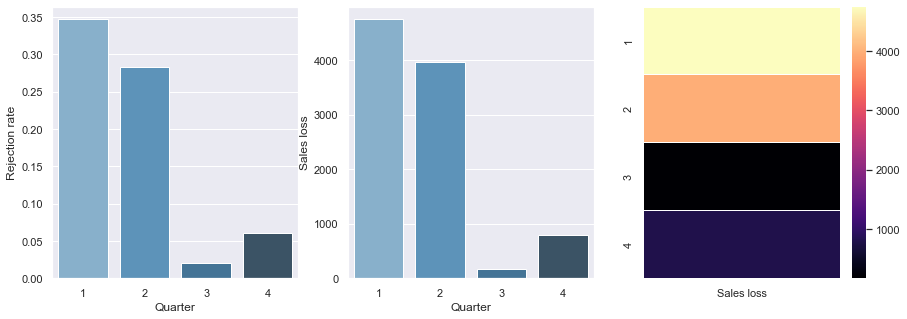

In [37]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace = 0.2)
g1=sns.barplot(Sales_all.iloc[:,0],Sales_all.iloc[:,1],palette=("Blues_d"),ax=ax[1])
g2=sns.barplot(Rejection.iloc[:,0],Rejection.iloc[:,1],palette=("Blues_d"),ax=ax[0])
sns.heatmap(Sales_all[['Sales loss']],linewidths=.5,cmap="magma",ax=ax[2])

plt.xlabel('')

The first and second quarters have the most Sales loss/ Rejection rate followed by the fourth quarter then finally  the Third one.

There is a big difference between the losses during the first and second quarters in comparaison with the third and fourth quarters

## Reasons of rejection:

In [38]:
df1=df.iloc[:8,4:]
#df1.insert(1,'Quarter',1)
df2=df.iloc[11:23,4:]
#df2.insert(1,'Quarter',2)
df3=df.iloc[26:28,4:]
#df3.insert(1,'Quarter',3)
df4=df.iloc[32:,4:]
#df4.insert(1,'Quarter',4)
tab=pd.concat([df1, df2, df3, df4])
tab=tab.groupby(['Reason']).sum().reset_index()
#tab['Reason']=tab['Reason'].astype(str)
#tab.dtypes
#tab
tab=tab.sort_values('Sales loss', ascending=False)
tab['percent'] = (tab['Sales loss'] / tab['Sales loss'].sum()) * 100
tab.head()
#tab

,Reason,Rejected orders,Rejection rate,Sales loss,percent
10,No Response,36,1.5363,3180,32.858029
6,Late Delivery,19,0.4371,1992,20.582765
9,No Courier,10,0.2310,1140,11.779293
14,Unreachable,10,0.2299,909,9.392436
1,Closed,5,0.3793,524,5.414342


In [39]:
df1=df.iloc[:8,4:]
df1.insert(1,'Quarter',1)
#df1['percent'] = (df1['Sales loss'] / df1['Sales loss'].sum()) * 100
df2=df.iloc[11:23,4:]
#df2['percent'] = (df2['Sales loss'] / df2['Sales loss'].sum()) * 100
df2.insert(1,'Quarter',2)
df3=df.iloc[26:28,4:]
#df3['percent'] = (df3['Sales loss'] / df3['Sales loss'].sum()) * 100
df3.insert(1,'Quarter',3)
df4=df.iloc[32:,4:]
#df4['percent'] = (df4['Sales loss'] / df4['Sales loss'].sum()) * 100
df4.insert(1,'Quarter',4)
df4
tab2=pd.concat([df1, df2, df3, df4])
tab2['percent'] = (tab2['Sales loss'] / tab2['Sales loss'].sum()) * 100
tab2=tab2[tab2['Reason'].isin(['No Response','Late Delivery','No Courier','Unreachable','Closed'])]
tab2.head()

,Reason,Quarter,Rejected orders,Rejection rate,Sales loss,percent
1,Unreachable,1,5,0.1163,502,5.187022
3,No Courier,1,7,0.1628,938,9.692085
4,Closed,1,1,0.0233,154,1.591238
6,Late Delivery,1,10,0.2326,1002,10.353379
7,No Response,1,16,0.3721,1619,16.728663


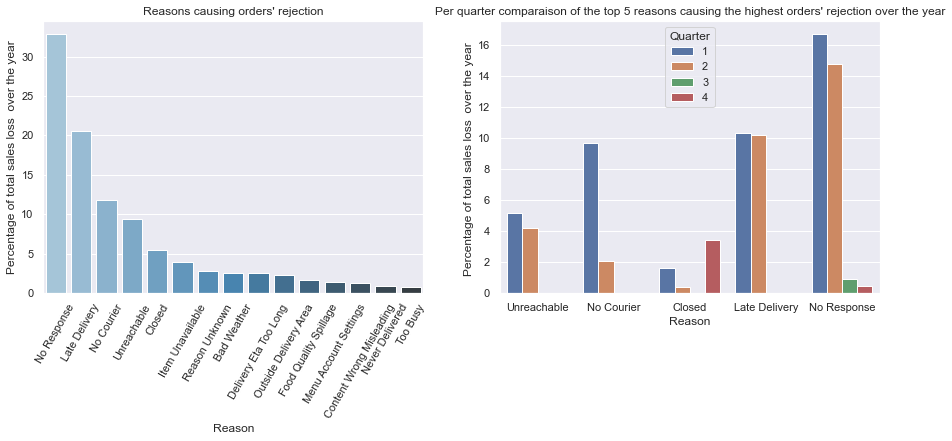

In [40]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace = 0.2)
# make barplot and sort bars in descending order
g1=sns.barplot(x='Reason', 
            y="percent", 
            data=tab, 
            order=tab.sort_values('percent',ascending = False).Reason,palette=("Blues_d"),ax=ax[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=60)
ax[0].set_ylabel("Percentage of total sales loss  over the year")

ax[0].title.set_text("Reasons causing orders' rejection") 
g2=sns.barplot(x='Reason', 
            y="percent", 
            data=tab2,
            hue='Quarter',ax=ax[1])

g2.set_xticklabels(g2.get_xticklabels(), rotation=0)
ax[1].set_ylabel("Percentage of total sales loss  over the year ")
ax[1].title.set_text("Per quarter comparaison of the top 5 reasons causing the highest orders' rejection over the year") 


In the first graph, we see the reasons causing the orders' rejections.

We see that the top 5 reasons causing the highest amount of losses are: 'No Response','Late Delivery','No Courier','Unreachable','Closed'

In the second graph, we see the percentage of total loses caused by the top 5 reasons causing the highest amount of losses during the year. 

We see that there is a big decrease in the loses in general specially the ones caused by the responses/Delivery/Courier betsween the first and second half of the year.